In [51]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [52]:
%matplotlib inline

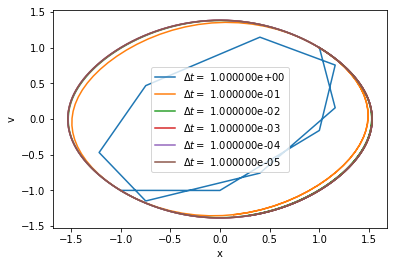

In [56]:
def f1(x):
    return - np.sin(x)

def Verlet(f1, x0, v0, dt=1e-3, N=10000):
    vHistory_ = [v0, v0 + f1(x0)*dt/2]
    xHistory = [x0] # at integer times
    tHistory = [0]
    for n in range(N):
        vHistory_.append(vHistory_[-1] + f1(xHistory[-1])*dt/2)
        xHistory.append(xHistory[-1] + vHistory_[-1]*dt)
        vHistory_.append(vHistory_[-1] + f1(xHistory[-1])*dt/2)
        tHistory.append(dt*(n+1))

    vHistory = vHistory_[::2]
    
    return xHistory, vHistory, tHistory

for m in range(0,6):
    dt = 10**(-m)
    xHistory, vHistory,_ = Verlet(f1, 1., 1., dt=dt, N=int(10./dt)) 
    plt.plot(xHistory, vHistory, label='$\Delta t=$ %e' %dt )
plt.xlabel('x')
plt.ylabel('v')
plt.legend(loc='best')  
plt.show()

In [57]:
def E(X):
    return X[1]*X[1]/2-np.cos(X[0])

In [ ]:
for m in range(0,6):
    dt = 10**(-m)
    xHistory, vHistory, tHistory = Verlet(f1, 1., 1., dt=dt, N=int(10./dt)) 
    Ehistory = [E([xHistory[n], vHistory[n]]) for n in range(len(xHistory))]
    plt.plot(tHistory, Ehistory, label='$\Delta t=$ %e' %dt )
    print('Error in E at dt=%e: %e' %(dt, np.abs(Ehistory[-1]-Ehistory[0]))) 
plt.xlabel('t')
plt.ylabel('E')
plt.legend(loc='best')
plt.show()

Error in E at dt=1.000000e+00: 7.575215e-05
Error in E at dt=1.000000e-01: 5.181130e-02
Error in E at dt=1.000000e-02: 6.145480e-03
Error in E at dt=1.000000e-03: 6.243407e-04
Error in E at dt=1.000000e-04: 6.253208e-05
